<h1>Coronavirus COVID-19 Tweets</h1>


<img src="https://www.googleapis.com/download/storage/v1/b/kaggle-user-content/o/inbox%2F769452%2F35db2dd68238bfd958efdabebc9fef8f%2Fcovid-19-4961257_1280-e1586986896105.jpg?generation=1595760042647275&alt=media" width="600"></img>


# Introduction


The Dataset we are using here is collected using Twitter API, **tweepy** and Python package.


# Data preparation

## Load packages

In [1]:
import numpy as np 
import pandas as pd
import matplotlib
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
from wordcloud import WordCloud, STOPWORDS

## Load data

In [2]:
tweets_df = pd.read_csv("/kaggle/input/covid19-tweets/covid19_tweets.csv")

# Data exploration


## Glimpse the data

In [3]:
print(f"data shape: {tweets_df.shape}")

data shape: (44436, 13)


In [4]:
tweets_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44436 entries, 0 to 44435
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   user_name         44436 non-null  object
 1   user_location     35169 non-null  object
 2   user_description  41861 non-null  object
 3   user_created      44436 non-null  object
 4   user_followers    44436 non-null  int64 
 5   user_friends      44436 non-null  int64 
 6   user_favourites   44436 non-null  int64 
 7   user_verified     44436 non-null  bool  
 8   date              44436 non-null  object
 9   text              44436 non-null  object
 10  hashtags          31794 non-null  object
 11  source            44432 non-null  object
 12  is_retweet        44436 non-null  bool  
dtypes: bool(2), int64(3), object(8)
memory usage: 3.8+ MB


In [5]:
tweets_df.describe()

,user_followers,user_friends,user_favourites
count,4.443600e+04,44436.000000,4.443600e+04
mean,1.229834e+05,2054.781011,1.443708e+04
std,8.870854e+05,8986.066644,4.541056e+04
min,0.000000e+00,0.000000,0.000000e+00
25%,1.600000e+02,133.000000,1.840000e+02
50%,9.135000e+02,505.000000,1.746500e+03
75%,5.323000e+03,1657.000000,9.458500e+03
max,1.389284e+07,497363.000000,2.047197e+06


In [6]:
tweets_df.head()

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet
0,ᏉᎥ☻լꂅϮ,astroworld,wednesday addams as a disney princess keepin i...,2017-05-26 05:46:42,624,950,18775,False,2020-07-25 12:27:21,If I smelled the scent of hand sanitizers toda...,NaN,Twitter for iPhone,False
1,Tom Basile 🇺🇸,"New York, NY","Husband, Father, Columnist & Commentator. Auth...",2009-04-16 20:06:23,2253,1677,24,True,2020-07-25 12:27:17,Hey @Yankees @YankeesPR and @MLB - wouldn't it...,NaN,Twitter for Android,False
2,Time4fisticuffs,"Pewee Valley, KY",#Christian #Catholic #Conservative #Reagan #Re...,2009-02-28 18:57:41,9275,9525,7254,False,2020-07-25 12:27:14,@diane3443 @wdunlap @realDonaldTrump Trump nev...,['COVID19'],Twitter for Android,False
3,ethel mertz,Stuck in the Middle,#Browns #Indians #ClevelandProud #[]_[] #Cavs ...,2019-03-07 01:45:06,197,987,1488,False,2020-07-25 12:27:10,@brookbanktv The one gift #COVID19 has give me...,['COVID19'],Twitter for iPhone,False
4,DIPR-J&K,Jammu and Kashmir,🖊️Official Twitter handle of Department of Inf...,2017-02-12 06:45:15,101009,168,101,False,2020-07-25 12:27:08,25 July : Media Bulletin on Novel #CoronaVirus...,"['CoronaVirusUpdates', 'COVID19']",Twitter for Android,False


### Missing data

In [7]:
def missing_data(data):
    total = data.isnull().sum()
    percent = (data.isnull().sum()/data.isnull().count()*100)
    tt = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    types = []
    for col in data.columns:
        dtype = str(data[col].dtype)
        types.append(dtype)
    tt['Types'] = types
    return(np.transpose(tt))

In [8]:
missing_data(tweets_df)

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet
Total,0,9267,2575,0,0,0,0,0,0,0,12642,4,0
Percent,0,20.8547,5.79485,0,0,0,0,0,0,0,28.4499,0.00900171,0
Types,object,object,object,object,int64,int64,int64,bool,object,object,object,object,bool


### Unique values

In [9]:
def unique_values(data):
    total = data.count()
    tt = pd.DataFrame(total)
    tt.columns = ['Total']
    uniques = []
    for col in data.columns:
        unique = data[col].nunique()
        uniques.append(unique)
    tt['Uniques'] = uniques
    return(np.transpose(tt))

In [10]:
unique_values(tweets_df)

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet
Total,44436,35169,41861,44436,44436,44436,44436,44436,44436,44436,31794,44432,44436
Uniques,27815,9771,26296,28152,10773,5915,14447,2,34571,44354,14569,360,1


### Most frequent values

In [11]:
def most_frequent_values(data):
    total = data.count()
    tt = pd.DataFrame(total)
    tt.columns = ['Total']
    items = []
    vals = []
    for col in data.columns:
        itm = data[col].value_counts().index[0]
        val = data[col].value_counts().values[0]
        items.append(itm)
        vals.append(val)
    tt['Most frequent item'] = items
    tt['Frequence'] = vals
    tt['Percent from total'] = np.round(vals / total * 100, 3)
    return(np.transpose(tt))

In [12]:
most_frequent_values(tweets_df)

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet
Total,44436,35169,41861,44436,44436,44436,44436,44436,44436,44436,31794,44432,44436
Most frequent item,GlobalPandemic.NET,India,Breaking News & Critical Information to SURVIV...,2010-07-13 21:58:05,0,0,0,False,2020-07-29 16:30:00,Madhya Pradesh CM Shivraj Singh Chouhan says h...,['COVID19'],Twitter Web App,False
Frequence,205,1084,205,205,434,768,1300,38619,26,6,9290,13415,44436
Percent from total,0.461,3.082,0.49,0.461,0.977,1.728,2.926,86.909,0.059,0.014,29.219,30.192,100


## Visualize the data distribution

In [13]:
def plot_count(feature, title, df, size=1):
    f, ax = plt.subplots(1,1, figsize=(4*size,4))
    total = float(len(df))
    g = sns.countplot(df[feature], order = df[feature].value_counts().index[:20], palette='Set3')
    g.set_title("Number and percentage of {}".format(title))
    if(size > 2):
        plt.xticks(rotation=90, size=8)
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x()+p.get_width()/2.,
                height + 3,
                '{:1.2f}%'.format(100*height/total),
                ha="center") 
    plt.show()    

### User name

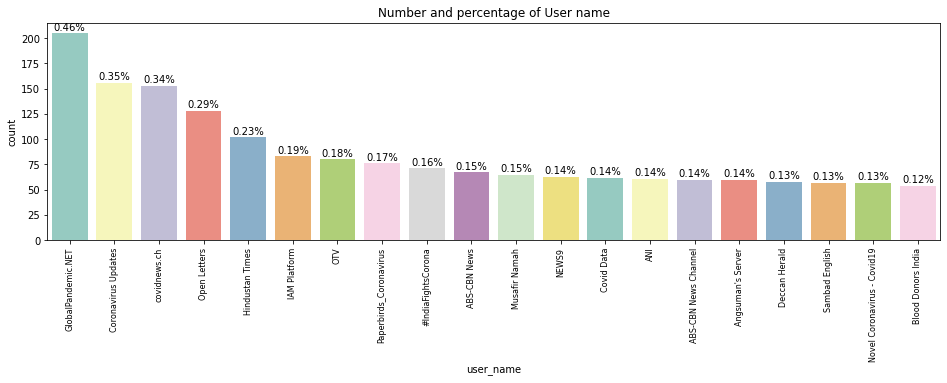

In [14]:
plot_count("user_name", "User name", tweets_df,4)

### User location

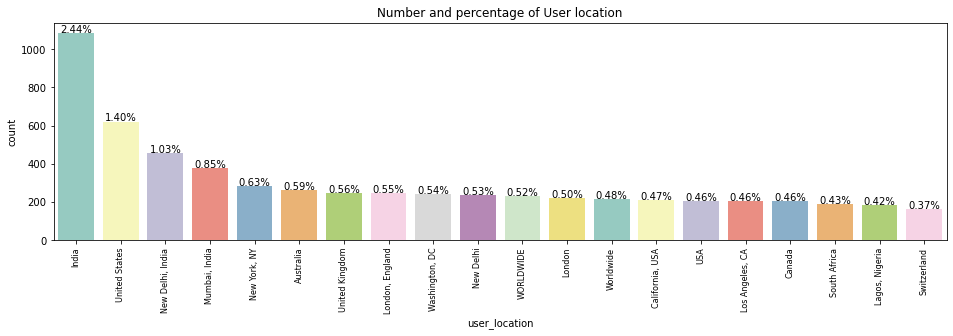

In [15]:
plot_count("user_location", "User location", tweets_df,4)

### Tweet source

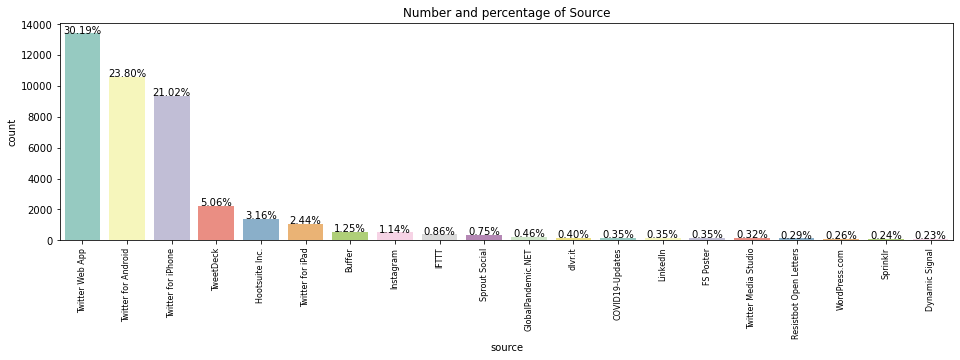

In [16]:
plot_count("source", "Source", tweets_df,4)

In [17]:
stopwords = set(STOPWORDS)

def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=50,
        max_font_size=40, 
        scale=5,
        random_state=1
    ).generate(str(data))

    fig = plt.figure(1, figsize=(10,10))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)

    plt.imshow(wordcloud)
    plt.show()

In [18]:
### Text wordcloauds

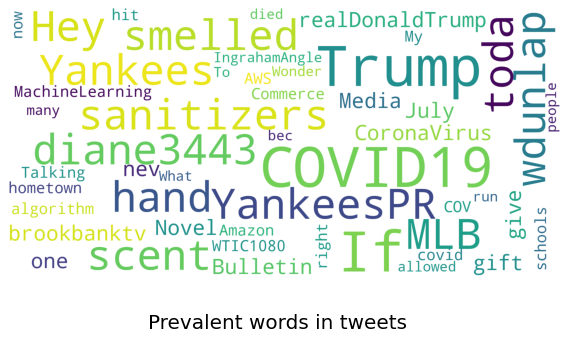

In [19]:
show_wordcloud(tweets_df['text'], title = 'Prevalent words in tweets')

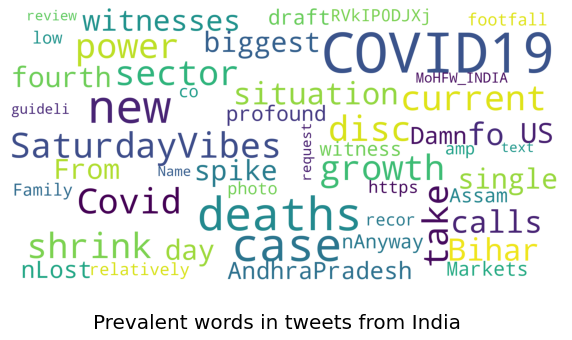

In [20]:
india_df = tweets_df.loc[tweets_df.user_location=="India"]
show_wordcloud(india_df['text'], title = 'Prevalent words in tweets from India')

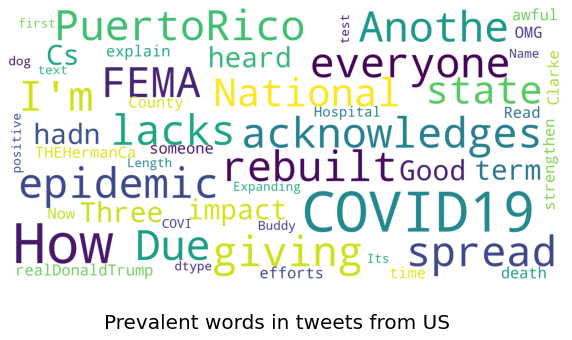

In [21]:
us_df = tweets_df.loc[tweets_df.user_location=="United States"]
show_wordcloud(us_df['text'], title = 'Prevalent words in tweets from US')

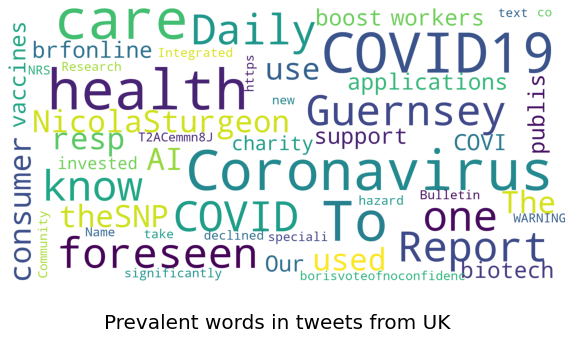

In [22]:
us_df = tweets_df.loc[tweets_df.user_location=="United Kingdom"]
show_wordcloud(us_df['text'], title = 'Prevalent words in tweets from UK')

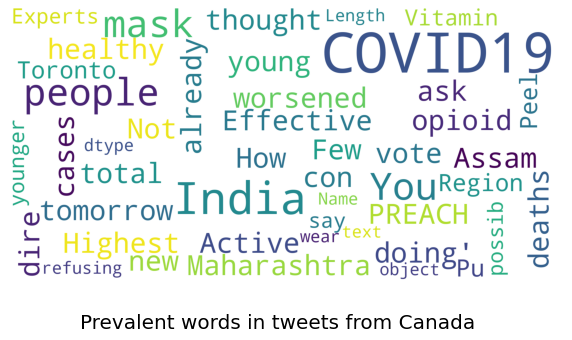

In [23]:
us_df = tweets_df.loc[tweets_df.user_location=="Canada"]
show_wordcloud(us_df['text'], title = 'Prevalent words in tweets from Canada')

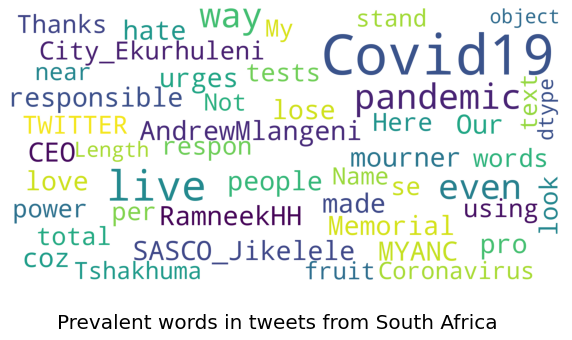

In [24]:
india_df = tweets_df.loc[tweets_df.user_location=="South Africa"]
show_wordcloud(india_df['text'], title = 'Prevalent words in tweets from South Africa')

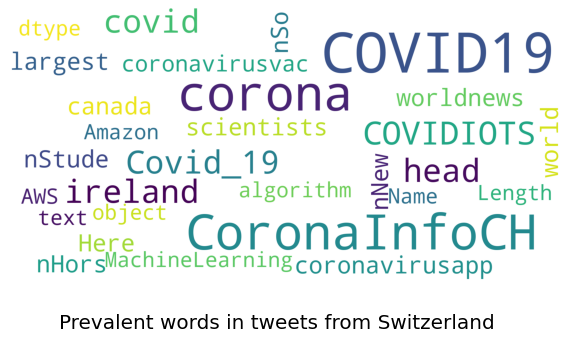

In [25]:
india_df = tweets_df.loc[tweets_df.user_location=="Switzerland"]
show_wordcloud(india_df['text'], title = 'Prevalent words in tweets from Switzerland')

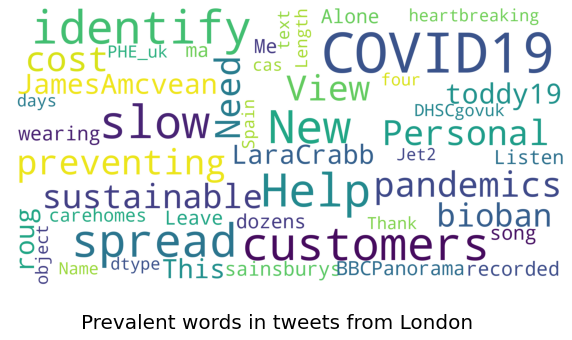

In [26]:
us_df = tweets_df.loc[tweets_df.user_location=="London"]
show_wordcloud(us_df['text'], title = 'Prevalent words in tweets from London')

### Hashtags analysis

In [27]:
def plot_features_distribution(features, title, df, isLog=False):
    plt.figure(figsize=(12,6))
    plt.title(title)
    for feature in features:
        if(isLog):
            sns.distplot(np.log1p(df[feature]),kde=True,hist=False, bins=120, label=feature)
        else:
            sns.distplot(df[feature],kde=True,hist=False, bins=120, label=feature)
    plt.xlabel('')
    plt.legend()
    plt.show()


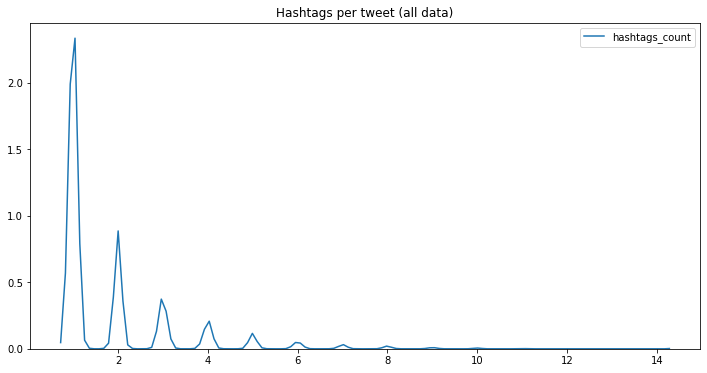

In [28]:
tweets_df['hashtags'] = tweets_df['hashtags'].replace(np.nan, "['None']", regex=True)
tweets_df['hashtags'] = tweets_df['hashtags'].apply(lambda x: x.replace('\\N',''))
tweets_df['hashtags_count'] = tweets_df['hashtags'].apply(lambda x: len(x.split(',')))
plot_features_distribution(['hashtags_count'], 'Hashtags per tweet (all data)', tweets_df)

In [29]:
tweets_df['hashtags_individual'] = tweets_df['hashtags'].apply(lambda x: x.split(','))
from itertools import chain
all_hashtags = set(chain.from_iterable(list(tweets_df['hashtags_individual'])))
print(f"There are totally: {len(all_hashtags)}")

There are totally: 19892
